## 1) Import Libraries

In [1]:
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from IPython.display import display

from docling.datamodel.base_models import FigureElement, InputFormat, Table
from docling.backend.docling_parse_backend import DoclingParseDocumentBackend
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling_core.types.doc import ImageRefMode, PictureItem, TableItem
from docling.datamodel.pipeline_options import (
    EasyOcrOptions,
    OcrMacOptions,
    PdfPipelineOptions,
    RapidOcrOptions,
    TesseractCliOcrOptions,
    TesseractOcrOptions
)

c:\Users\xenow\Downloads\MyGitRepos\DoclingProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2) Example via document

In [2]:
start_time = time.time()
source = "documents/CC&L Q Global.pdf"

converter = DocumentConverter()
result = converter.convert(source)

end_time = time.time() - start_time

print(f'Total time take for parsing {end_time:.2f} seconds.')

2025-09-28 14:04:48,643 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-28 14:04:49,734 - INFO - Going to convert document batch...
2025-09-28 14:04:49,735 - INFO - Initializing pipeline for StandardPdfPipeline with options hash e647edf348883bed75367b22fbe60347
2025-09-28 14:04:49,742 - INFO - Loading plugin 'docling_defaults'
2025-09-28 14:04:49,743 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-09-28 14:04:49,749 - INFO - Loading plugin 'docling_defaults'
2025-09-28 14:04:49,752 - INFO - Registered ocr engines: ['easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-09-28 14:04:50,427 - INFO - Accelerator device: 'cpu'
2025-09-28 14:04:51,630 - INFO - Accelerator device: 'cpu'
2025-09-28 14:04:53,115 - INFO - Accelerator device: 'cpu'
2025-09-28 14:04:53,343 - INFO - Processing document CC&L Q Global.pdf
c:\Users\xenow\Downloads\MyGitRepos\DoclingProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argumen

Total time take for parsing 156.57 seconds.


In [3]:
print(result.document.export_to_markdown())

## Q Global Equity)

## Aon Investment Manager Research Due Diligence Questionnaire (

## Please read these instructions before completing this questionnaire.

Should any questions not be applicable, please indicate as such by responding with 'n/a' or 'not applicable'. All market value information should be stated in millions ($USD) unless indicated otherwise. Please note the difference between individual or organizational accounts. Please enter responses to the questions in the spaces provided and/or in an attached document.

If you are responding with information on more than one product, please copy section one to four. Please provide your Due Diligence Questionnaire answer file in a Word document format (not PDF).

In the case of multiple product submission, please clearly label each product at the top of this page.

Any supporting materials must be clearly referenced to the appropriate question and appropriately labeled.

Information and supplemental attachments that are strictly 

## 3) Advanced Features of docling

### 3.1) Parser Pipeline

In [ ]:
IMAGE_RESOLUTION_SCALE = 2.0

input_doc_path = Path(source)

pipeline_options = PdfPipelineOptions()
pipeline_options.images_scale = IMAGE_RESOLUTION_SCALE
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = True

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

In [5]:
start_time = time.time()
conv_res = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time
print(f'Total time take for parsing {end_time:.2f} seconds.')

2025-09-28 14:35:34,568 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-09-28 14:35:34,574 - INFO - Going to convert document batch...
2025-09-28 14:35:34,576 - INFO - Initializing pipeline for StandardPdfPipeline with options hash ce2db4bc6b59e8bf84cfaffa1879c953
2025-09-28 14:35:34,576 - INFO - Accelerator device: 'cpu'
2025-09-28 14:35:35,698 - INFO - Accelerator device: 'cpu'
2025-09-28 14:35:36,607 - INFO - Accelerator device: 'cpu'
2025-09-28 14:35:36,843 - INFO - Processing document PDF-IAS-2025-10-CompleteIssue.pdf
c:\Users\xenow\Downloads\MyGitRepos\DoclingProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\xenow\Downloads\MyGitRepos\DoclingProject\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device p

Total time take for parsing 73.10 seconds.


### 3.2) Extract metadata

In [6]:
print('Document Name: ', conv_res.document.origin.filename)
print('Document Type: ', conv_res.document.origin.mimetype)
print('Number of Pages: ', len(conv_res.document.pages.keys()))
print('Number of Text Elements: ', len(conv_res.document.dict()['texts']))
print('Number of Text Tables: ', len(conv_res.document.dict()['tables']))
print('Number of Text Images: ', len(conv_res.document.dict()['pictures']))

Document Name:  PDF-IAS-2025-10-CompleteIssue.pdf
Document Type:  application/pdf
Number of Pages:  20
Number of Text Elements:  450
Number of Text Tables:  13
Number of Text Images:  15


C:\Users\xenow\AppData\Local\Temp\ipykernel_23896\1348740120.py:4: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print('Number of Text Elements: ', len(conv_res.document.dict()['texts']))
C:\Users\xenow\AppData\Local\Temp\ipykernel_23896\1348740120.py:5: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print('Number of Text Tables: ', len(conv_res.document.dict()['tables']))
C:\Users\xenow\AppData\Local\Temp\ipykernel_23896\1348740120.py:6: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration

#### 3.2.1) Iterate through text units

In [7]:
results_body = conv_res.document.dict()

dict_list = []

texts = results_body['texts']
for t in texts:
    ref = t['self_ref']
    text_content = t['text']
    page = t['prov'][0]['page_no']
    dict_list.append({'text_reference':ref, 'page': page, 'text_content(first 500 chars)':text_content[:500]})

C:\Users\xenow\AppData\Local\Temp\ipykernel_23896\1857685037.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  results_body = conv_res.document.dict()


In [8]:
df = pd.DataFrame(dict_list)

df

,text_reference,page,text_content(first 500 chars)
0,#/texts/0,1,Page 1
1,#/texts/1,1,October 2025
2,#/texts/2,1,Ilnvestor
3,#/texts/3,1,Advisory Service
4,#/texts/4,1,October 2025
...,...,...,...
445,#/texts/445,20,NVIDIA
446,#/texts/446,20,2 EVALUATING Management
447,#/texts/447,20,3 PRICE-EARNINGS HISTORY as an indicator of th...
448,#/texts/448,20,4 EVALUATING RISK and REWARD over the next 5 y...


#### 3.2.2) Iterate through Tables

In [9]:
tables = results_body['tables']
dict_list = []

for t in tables:
    ref = t['self_ref']
    page = t['prov'][0]['page_no']

    table_captions = t['captions']
    if(len(table_captions) and 'cref' in table_captions[0].keys()):
        table_caption = table_captions[0]['cref']
    else:
        table_caption = 'No Caption'
    table_data = str(t['data'])[:100]

    dict_list.append({'table_reference':ref, 'page': page, 'table_captions': table_captions,'table_data(first 100 chars)':table_data})

In [10]:
df = pd.DataFrame(dict_list)

df

,table_reference,page,table_captions,table_data(first 100 chars)
0,#/tables/0,8,[],"{'table_cells': [{'bbox': {'l': 115.26, 't': 1..."
1,#/tables/1,11,[],"{'table_cells': [{'bbox': {'l': 100.564, 't': ..."
2,#/tables/2,13,[],"{'table_cells': [{'bbox': {'l': 397.872, 't': ..."
3,#/tables/3,14,[],"{'table_cells': [{'bbox': {'l': 151.128, 't': ..."
4,#/tables/4,14,[],"{'table_cells': [{'bbox': {'l': 149.256, 't': ..."
5,#/tables/5,14,[],"{'table_cells': [{'bbox': {'l': 64.44, 't': 36..."
6,#/tables/6,14,[],"{'table_cells': [{'bbox': {'l': 61.56, 't': 63..."
7,#/tables/7,15,[],"{'table_cells': [{'bbox': {'l': 85.5, 't': 369..."
8,#/tables/8,19,[],"{'table_cells': [{'bbox': {'l': 443.664, 't': ..."
9,#/tables/9,20,[],"{'table_cells': [{'bbox': {'l': 151.128, 't': ..."


#### 3.2.3) Iterate through Tables

In [11]:
images = results_body['pictures']
dict_list = []

for i in images:
    ref = i['self_ref']
    page = i['prov'][0]['page_no']

    image_captions = i['captions']

    if(len(image_captions) and 'cref' in image_captions[0].keys()):
        image_caption = image_captions[0]['cref']
    else:
        image_caption = 'No Caption'
    image_data = str(t['image'])[:100]

    dict_list.append({'image_reference':ref, 'page': page, 'image_captions': image_captions,'image_data(first 100 chars)':image_data})

In [12]:
df = pd.DataFrame(dict_list)

df

,image_reference,page,image_captions,image_data(first 100 chars)
0,#/pictures/0,1,[],None
1,#/pictures/1,2,[],None
2,#/pictures/2,2,[],None
3,#/pictures/3,3,[{'cref': '#/texts/41'}],None
4,#/pictures/4,3,[],None
5,#/pictures/5,3,[{'cref': '#/texts/75'}],None
6,#/pictures/6,8,[],None
7,#/pictures/7,11,[],None
8,#/pictures/8,13,[],None
9,#/pictures/9,13,[],None


### 3.3) Iterate though the pages of the document

In [13]:
## Display the pages

def display_images(images, images_per_row=5, figsize=(15,8)):

    # handle dictionary or list input
    if isinstance(images, dict):
        images = list(images.values())

    # calculate number of rows needed
    num_rows = math.ceil(len(images)/images_per_row)

    # create subplots
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=figsize)
    axes = axes.flatten() #flatten axes for easier iteration

    # plot images
    for ax, image in zip(axes, images):
        ax.imshow(image)
        ax.axis('off')

    # turn off unused axes
    for ax in axes[len(images):]:
        ax.axis('off')

    # adjust layout and display
    plt.tight_layout()
    plt.show()

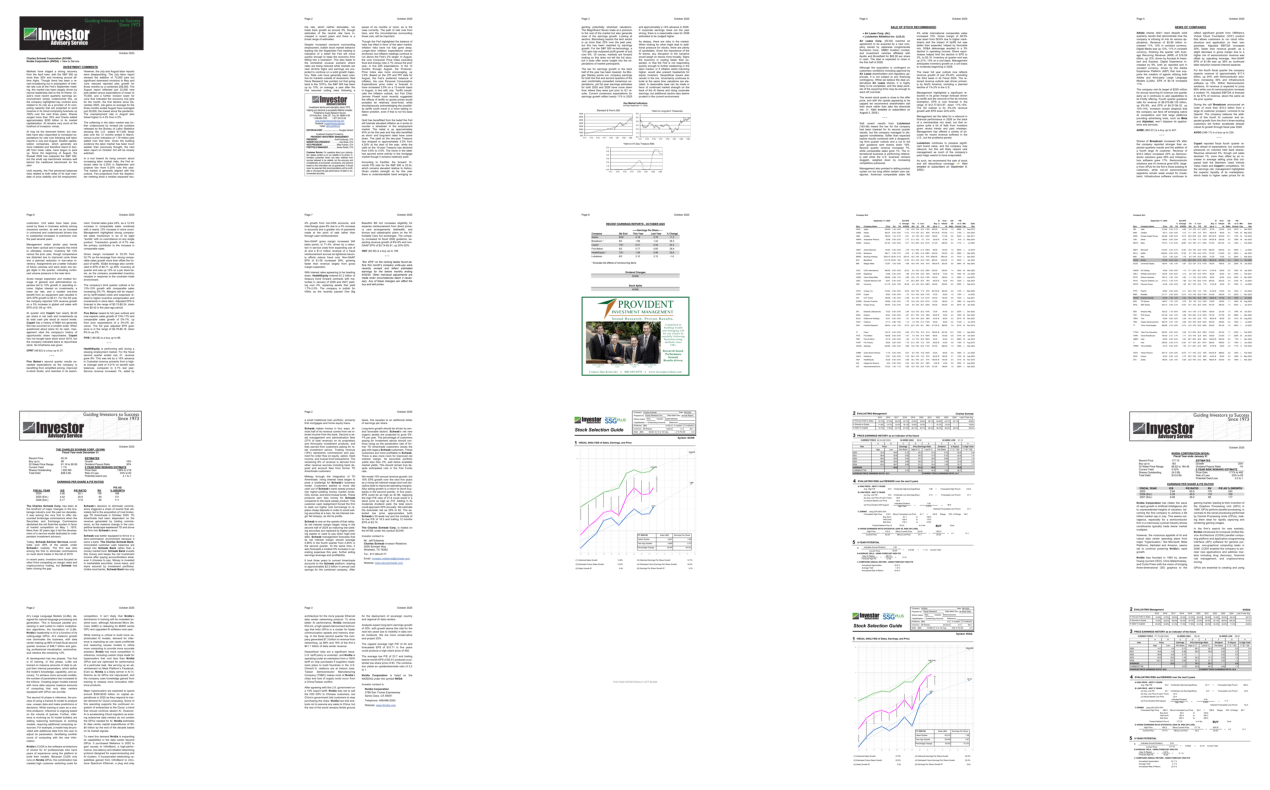

In [14]:
page_images = {page_no: page.image.pil_image for page_no, page in conv_res.document.pages.items()}
display_images(page_images, images_per_row=5, figsize=(15,8))

#### Save the page images to directory

In [ ]:
dir_path = './pages'
os.makedirs(dir_path, exist_ok=True)

for page_no, page in conv_res.document.pages.items():
    page_no = page.page_no
    page_image_filename = f"{page_no}.png"
    with open(os.path.join(dir_path, page_image_filename), 'wb') as fp: # use the built-in open() function
        page.image.pil_image.save(fp, format='PNG')

### 3.4 Extract all the images from the document

In [ ]:
dir_path = './images'
os.makedirs(dir_path, exist_ok=True)

images_list = []
image_number = 1

for element, _level in conv_res.document.iterate_items():
    if isinstance(element, PictureItem):
        element_image_filename = os.path.join(dir_path, str(image_number)) + '.png'
        with open(element_image_filename, 'wb') as fp:
            image = element.get_image(conv_res.document)
            image.save(fp, 'PNG')
            images_list.append(image)
        image_number += 1

In [ ]:
display_images(images_list, images_per_row=5, figsize=(15,8))

### 3.5 Extract all tables from the document

In [ ]:
dir_path = './tables'
dir_paths = ['./tables/images', './tables/CSVs', './tables/HTMLs']

[os.makedirs(path, exist_ok=True) for path in dir_paths]

table_list = []
table_number = 1

for element, _level in conv_res.document.iterate_items():
    if isinstance(element, TableItem):
        
        # saving tables as images
        element_table_filename = os.path.join(dir_path, 'images', str(table_number)) + '.png'
        with open(element_table_filename, 'wb') as fp:
            table_image = element.get_image(conv_res.document)
            table_image.save(fp,'PNG')
            table_list.append(table_image)

        # saving tables as CSV files
        table_df: pd.DataFrame = element.export_to_dataframe()
        element_table_filename = os.path.join(dir_path, 'CSVs', str(table_number)) + '.csv'
        table_df.to_csv(element_table_filename)

        # saving tables as HTML files
        table_html = element.export_to_html()
        element_table_filename = os.path.join(dir_path, 'HTMLs', str(table_number)) + '.html'
        with open(element_table_filename, 'w') as fp:
            fp.write(table_html)

        table_number += 1 

In [ ]:
display_images(table_list, images_per_row=5, figsize=(15,8))

## OCR pipeline

In [ ]:
def OCR_parsing(doc_path):
    input_doc = Path(doc_path)
    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.do_table_structure = True
    pipeline_options.table_structure_options.do_cell_matching = True
    ocr_options = EasyOcrOptions(force_full_page_ocr=True)
    pipeline_options.ocr_options = ocr_options
    pipeline_options.generate_page_images = True

    start_time = time.time()

    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_options=pipeline_options,
            )
        }
    )

    result = converter.convert(input_doc)
    end_time = time.time() - start_time
    print(f'Total time take for parsing {end_time: .2f} seconds.')
    return result

In [ ]:
OCR_result = OCR_parsing(source)

extract = OCR_result.document.export_to_markdown()

print('Docling Extract')
print(extract)

In [ ]:
page_images = {page_no: page.image.pil_image for page_no, page in OCR_result.document.pages.items()}
print('Actual Document')
display_images(page_images, images_per_row=2, figsize=(100,50))